In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno

In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix

In [3]:
data=pd.read_csv("C:/Users/imane/OneDrive/Bureau/Master MSI/Projet_Professionnel/MeriSKILL_virtual_internship/Project2-DiabetesPatients/diabetesDatabase.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
#available columns
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
#information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**comment**

This table represents the results of the .info() method applied to a Pandas DataFrame in a Python programming environment. According to these results, the DataFrame contains 768 entries with 9 columns. Each column has 768 non-null values, indicating that there are no missing values. The data types include int64 for most columns, with the exception of BMI and DiabetesPedigreeFunction, which are of type float64. The DataFrame occupies 54.1 kilobytes of memory.

In [6]:
#dataset statistical description 
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**comment**

This table show a statistical summary of a dataset typically used for diabetes research, provided by the .describe() method in Pandas. This summary includes count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum for each feature in the dataset. All columns have 768 non-null values, indicating a complete dataset with no missing values. The features include 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI' (Body Mass Index), 'DiabetesPedigreeFunction', 'Age', and the target variable 'Outcome'. The presence of zero values in some features like 'Glucose' and 'BloodPressure' may require further investigation as they are not clinically plausible and may represent missing or placeholder values.

In [7]:
#dataset statistical description transpose 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**Comment**

This table presents the same statistical summary as the previous one, but it has been transposed using the .describe().T method

In [8]:
#cheking for null Values
data.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


**comment**

This table shows the output of the isnull() function applied to our Pandas DataFrame. This function is used to identify missing values within the dataset. Each cell in the DataFrame is checked for null (missing) values, returning True if the value is null and False if it is not. In this specific output, all values are marked as False, indicating that there are no missing values in any of the columns of the dataset. 


In [9]:
#cheking for total null values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Comment**

This analysis shows the output of the isnull().sum() function from Pandas applied to our DataFrame, which counts the number of missing (null or NaN) values in each column. The output indicates that there are no missing values in any of the columns, including 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', and 'Outcome', all of which show a total of 0. The dtype: int64 suggests that the totals are integer values. Although the dataset is complete with no null entries, the presence of zero values in certain medical features warrants a more detailed analysis, where zeros may need to be replaced with NaNvalues for a correct assessment.

<Axes: >

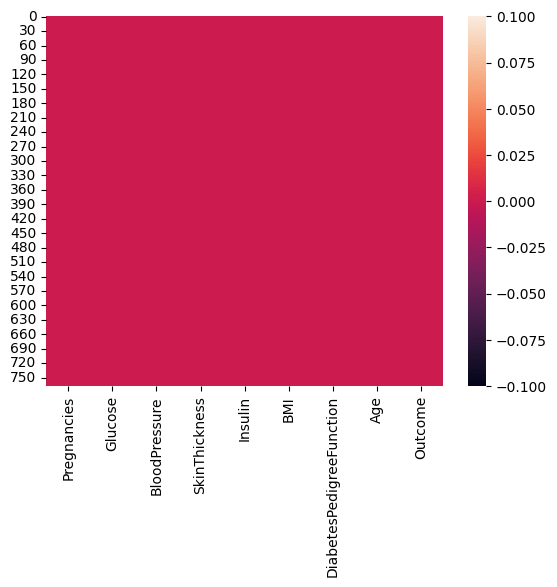

In [10]:
#heatmap from original data 
sns.heatmap(data.isnull())

**Comment**

The heatmap uses shades of color to represent numerical values across various features, such as 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', and 'Outcome'. The colors correspond to the magnitude of the data points. A color gradient is visible on the right, ranging from light to dark, indicating values on a scale. However, although our dataset is complete with no missing entries, the presence of zero values may confound the analysis, which is why the visualization is represented with a consistent color.

In [11]:
#copy data
data_copy = data.copy 
data_copy = data_copy(deep=True)
# Replace zeros with NaN in the specified columns
data_copy [['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]=data_copy [['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)
#check the number of NaNs in each column
print(data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


**Comment**

in this case we made a copy of the original data with data.copy(deep=True) function. After making the copy, certain columns have had their zero values replaced with NaN (Not a Number), which is a common approach to handle missing or invalid data in datasets. The output displayed is the result of calling isnull().sum() function on the modified DataFrame, which provides a count of NaN values in each column. 
the results shows that columns like 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', and 'BMI' have varying numbers of NaN values, suggesting that zeros in these columns were considered missing or invalid and replaced with NaN. For example, 'Glucose' has 5 NaN values, 'BloodPressure' has 35, 'SkinThickness' has 227, 'Insulin' has 374, and 'BMI' has 11. Other columns like 'Pregnancies', 'DiabetesPedigreeFunction', 'Age', and 'Outcome' have no NaN values indicating no zeros were replaced in these columns. 
The dtype: int64 indicates that the counts of NaN values are integer numbers.

<Axes: >

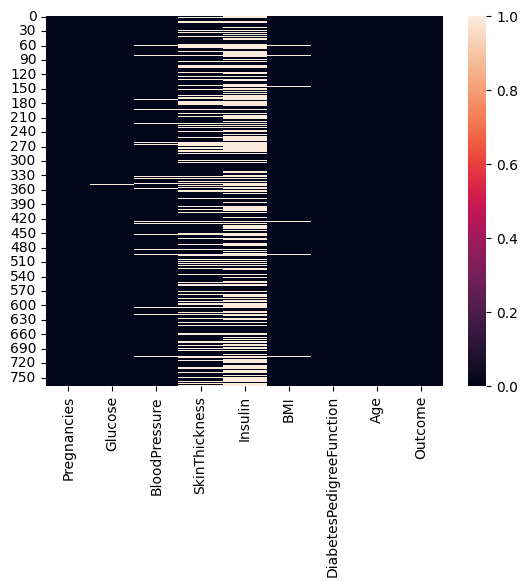

In [12]:
#heatmap from copy_data
sns.heatmap(data_copy.isnull())

**Comment**

This heatmap visualizes missing data in a diabetes copy dataset, where warmer colors represent a higher frequency of NaN values. It shows significant missing data for 'Insulin' and 'SkinThickness', moderate for 'BloodPressure' and 'BMI', and minimal for 'Glucose'. The other features, 'Pregnancies', 'DiabetesPedigreeFunction', 'Age', and 'Outcome', show no missing data. This heatmap effectively highlights the areas in the dataset that may require imputation or further data cleansing

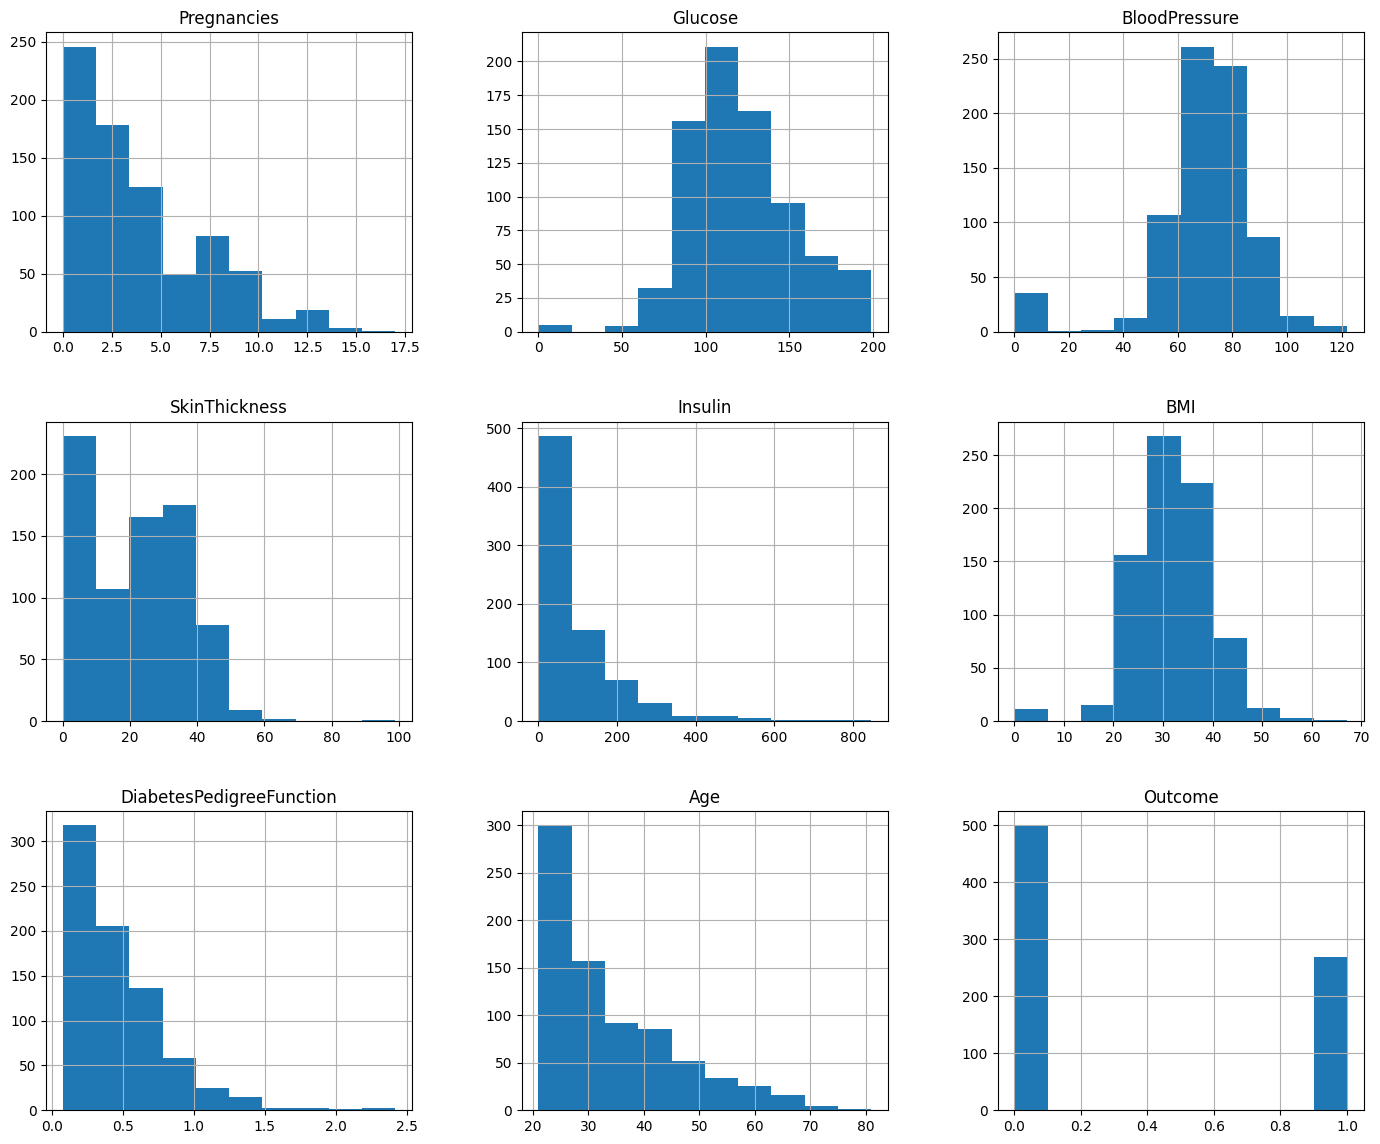

In [13]:
#Data Visualisation 
#Plotting the data distribution plots 
data.hist(figsize=(17,14))
plt.show()

- Pregnancies: This histogram shows the distribution of the number of pregnancies among individuals in the dataset. Most individuals have had 0 to 5 pregnancies, with the number tapering off as the number of pregnancies increases.

- Glucose: The histogram for glucose levels appears to be normally distributed, with the majority of values clustering around the central range. There's a peak where glucose levels are between 100 to 125 mg/dL.

- BloodPressure: This histogram displays the distribution of blood pressure readings. The data shows a concentration of values in the moderate range, with a notable peak in the systolic blood pressure readings around 70 to 80 mmHg.

- Skin Thickness: This histogram shows the distribution of skinfold thickness measurements among individuals in the dataset. The majority of measurements are concentrated in the lower range, indicating that most individuals have a skin thickness of less than 30 mm.

- Insulin: The histogram for insulin shows a right-skewed distribution, with a significant number of individuals having low insulin levels, and few individuals having high insulin levels, as reflected by the long tail towards the higher end of the scale.

- BMI (Body Mass Index): The BMI histogram appears to be roughly normally distributed, with most individuals' BMI scores clustering around the middle range, and fewer individuals with very low or very high BMI scores.

- Diabetes Pedigree Function: This histogram likely illustrates the distribution of the Diabetes Pedigree Function values within the dataset. The distribution seems to be skewed to the right, with most individuals having lower scores indicating fewer genetic influences on diabetes.

- Age: The age histogram is expected to show the age distribution of the individuals in the dataset. If the histogram is right-skewed, it would suggest a younger population, with fewer older individuals.

- Outcome: For the 'Outcome' histogram, which likely represents a binary classification of diabetes diagnosis (0 for no diabetes and 1 for diabetes), the histogram would typically show two bars corresponding to the count of individuals without and with diabetes. The height of each bar reflects the number of cases in each category.

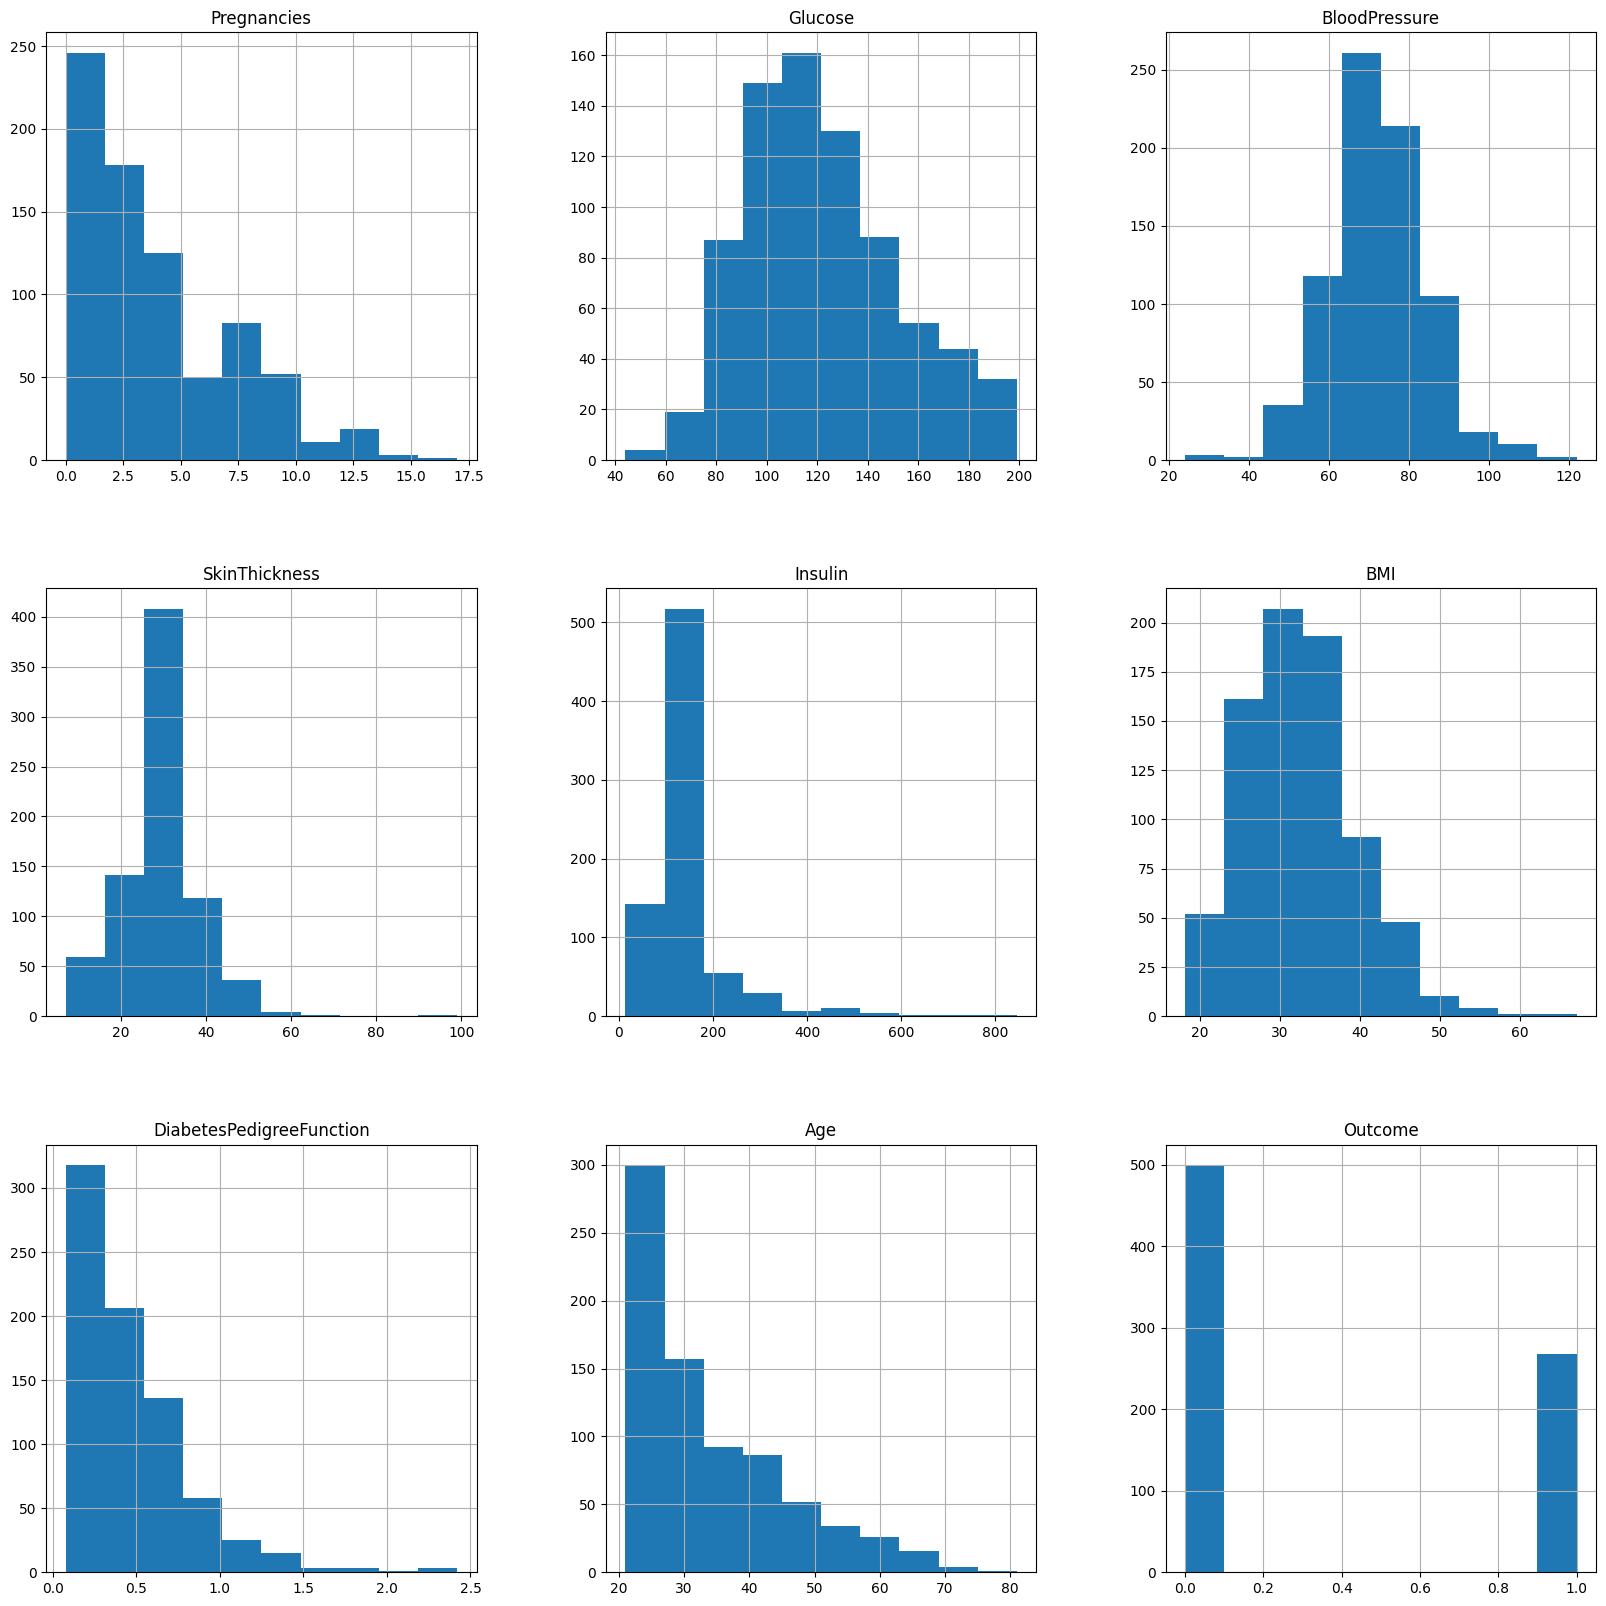

In [14]:
# insert NaN values into columns based on their natural data distribution in data_copy
data_copy['Glucose'].fillna(data_copy['Glucose'].mean(),inplace=True)
data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].mean(),inplace=True)
data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].median(),inplace=True)
data_copy['Insulin'].fillna(data_copy['Insulin'].median(),inplace=True)
data_copy['BMI'].fillna(data_copy['BMI'].median(),inplace=True)
#plotting the distribution after removing the NAN values 
p=data_copy.hist(figsize=(20,20))

- Glucose: The distribution appears roughly symmetrical and normally distributed, peaking around the 100 to 120 mg/dL range. This suggests that most individuals in the dataset have glucose levels within this range, which is generally considered normal or slightly elevated. The data tails off on both the lower and higher ends, indicating fewer individuals with very low or high glucose levels.
- histogram : is depicting the distribution of blood pressure measurements. The data shows a bell-shaped curve, which is typical of a normal distribution, with most values concentrated around the middle range. The peak of the histogram suggests that the average blood pressure in this dataset is around the normal range, with fewer occurrences of very low or very high blood pressure readings.
- Skin Thickness: The histogram indicates that skin thickness values in the dataset are mostly clustered in the lower range, with the highest frequency observed at lower skin thickness measurements. There are very few instances of high skin thickness values.
- Insulin: This histogram shows that most of the insulin level measurements are concentrated at the lower end of the scale, with a steep drop-off as the insulin levels increase. There's a significant number of individuals with insulin levels close to 0, which may warrant further investigation to understand if these represent actual measurements or missing daat
 - BMI (Body Mass Index): The distribution of BMI values appears to be roughly normal, with most data points falling in the middle range and symmetrical tails on either side. The majority of BMI readings are concentrated around the central value, indicating a common range where most individuals' BMI falls.

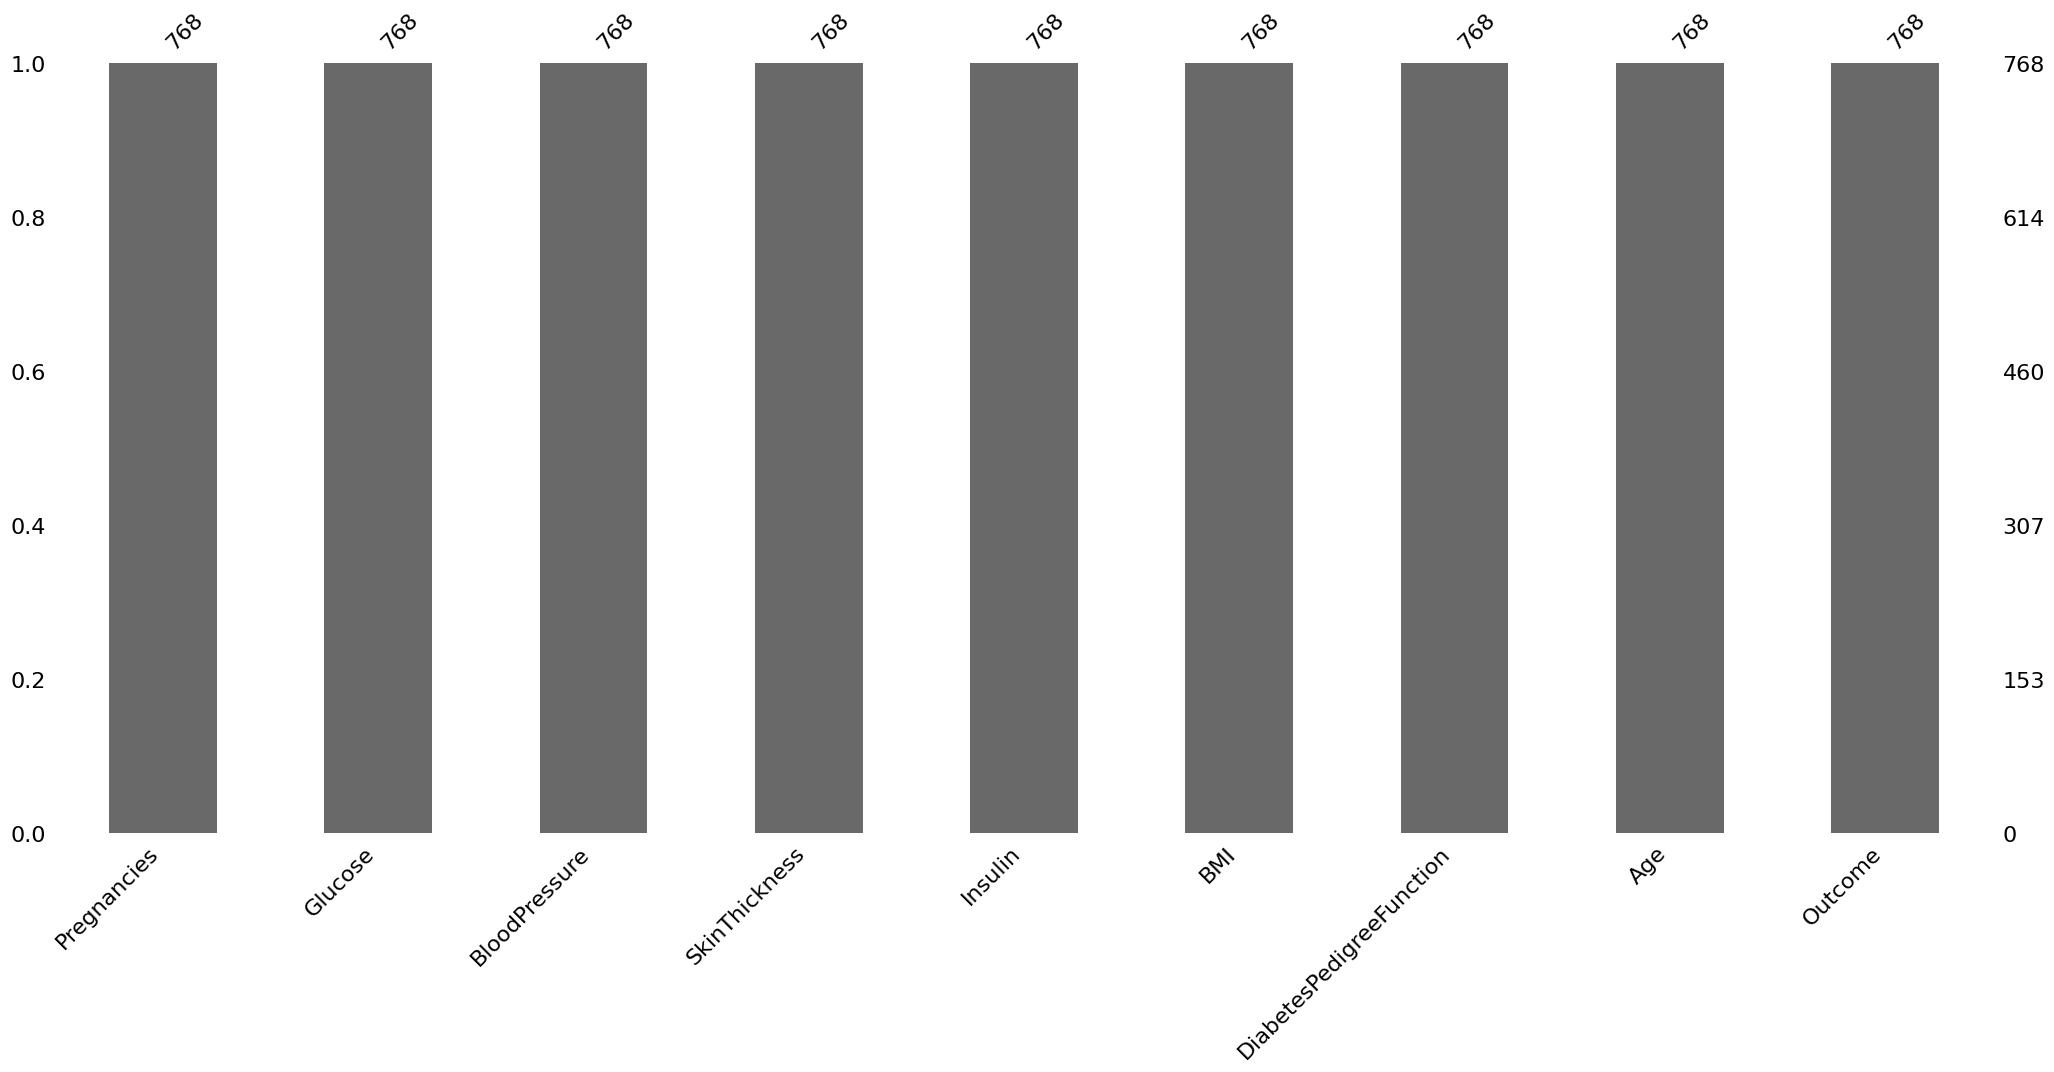

In [15]:
#plotting Null count analysis plot 
p = msno.bar(data)

This bar chart is representing the count of non-null entries for various health-related features in a dataset. Each bar likely corresponds to the total number of valid records for the respective feature, such as 'Pregnancies', 'Glucose', 'BloodPressure', etc. If all bars are reaching the same height, this indicates that each feature has the same number of non-null entries, suggesting a dataset with no missing values for these features. The 'Outcome' bar, if different from the others, might indicate the binary nature of this variable (usually representing presence or absence of a condition) with its own distinct count.

Outcome
0    500
1    268
Name: count, dtype: int64


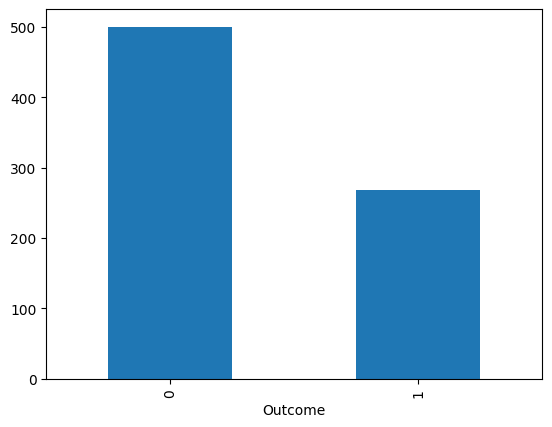

In [16]:
#counts of outcomes to check data balance
print(data.Outcome.value_counts())
p = data.Outcome.value_counts().plot(kind="bar")

the chart visually demonstrates the distribution of Outcomes in the dataset, with a greater number of '0' who represent No diapetes cas compared to '1' outcomes who the had diabetes.

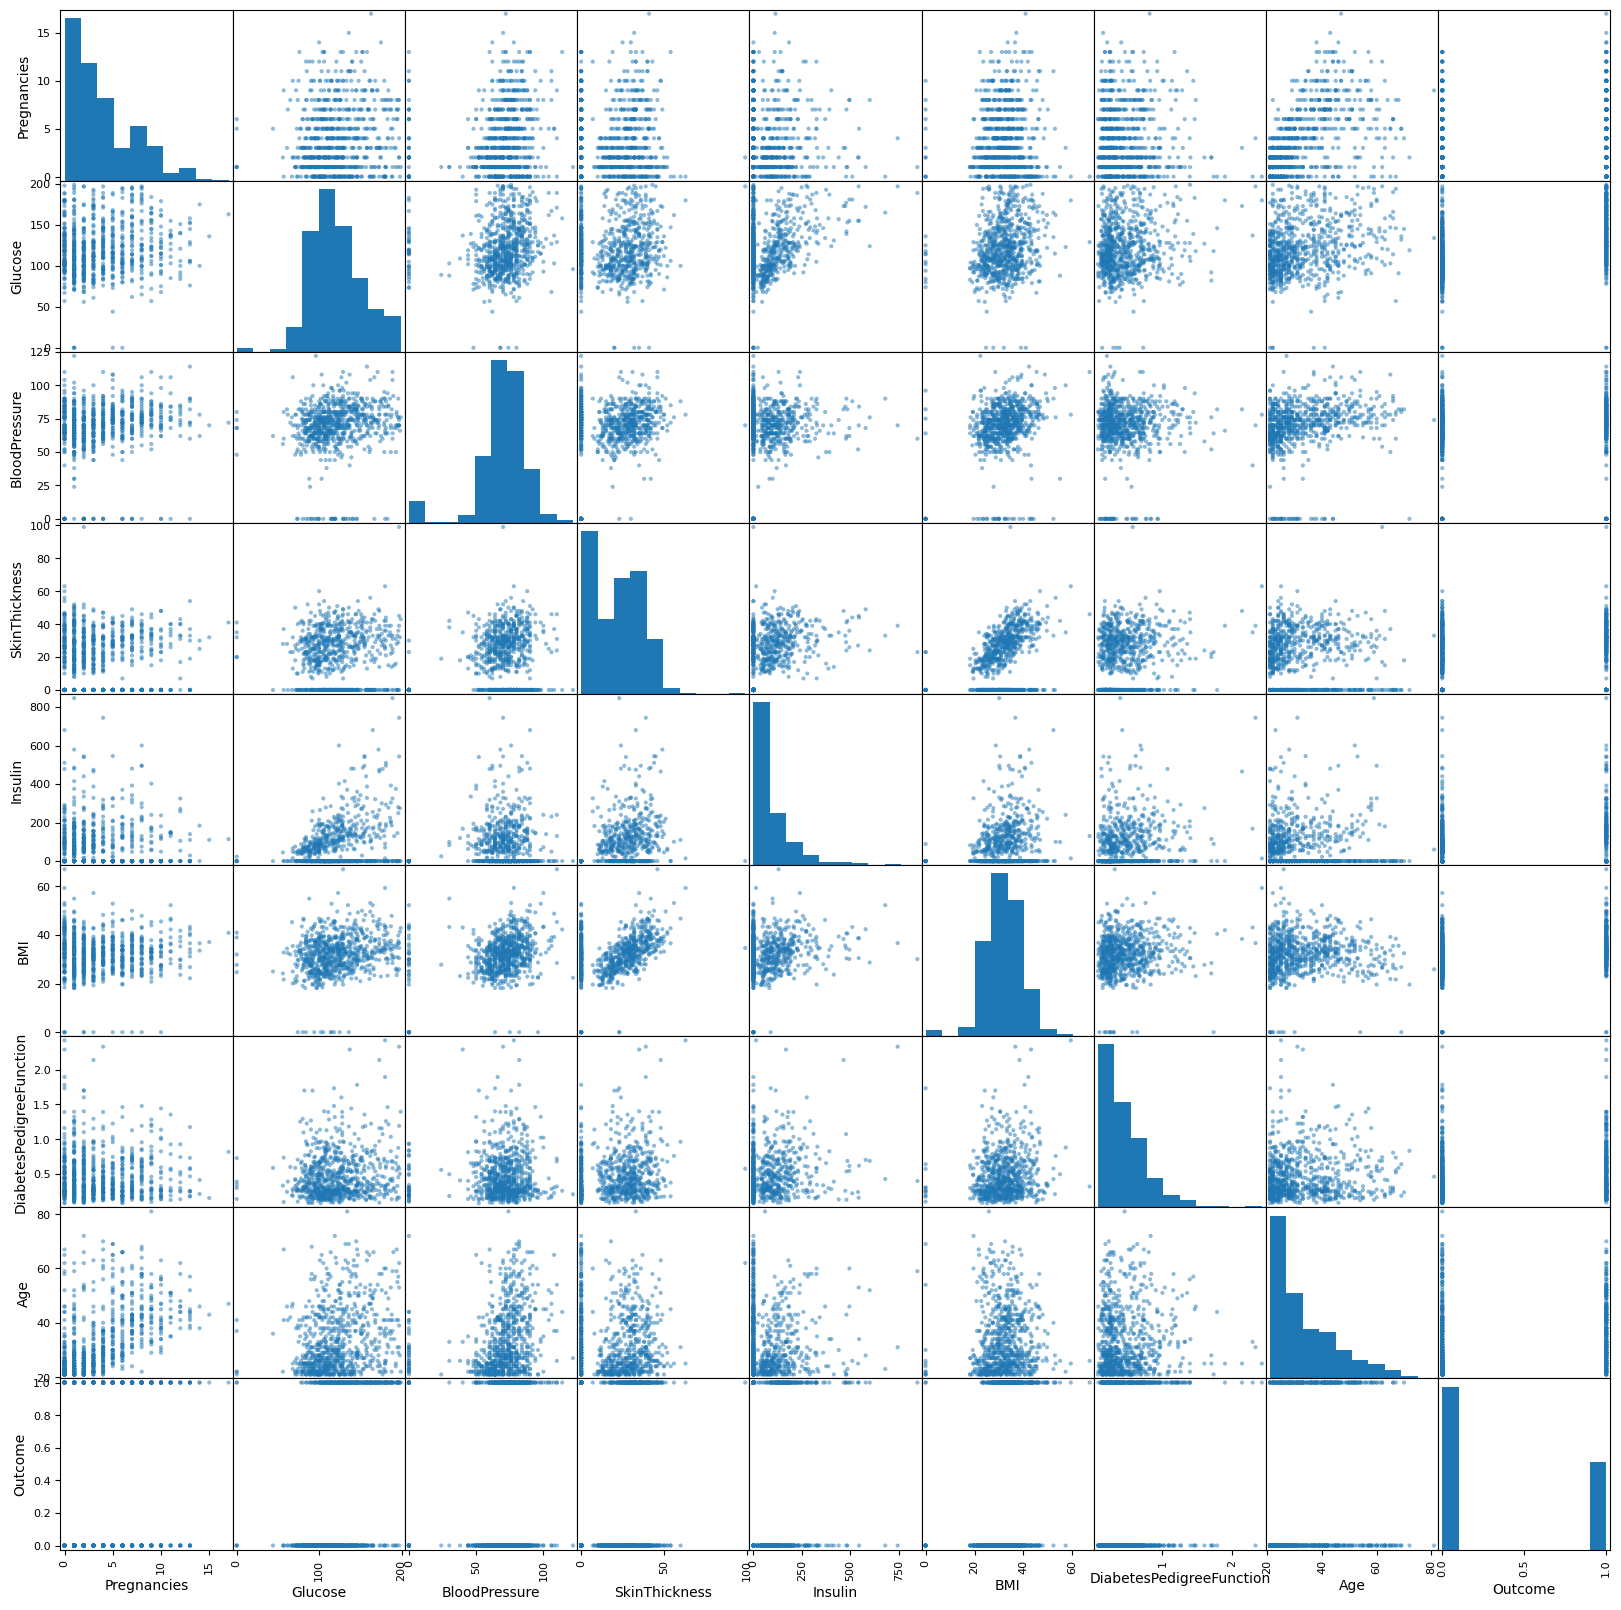

In [17]:
#plot scatter matrix of uncleaned data 
p= scatter_matrix(data, figsize=(20,20))

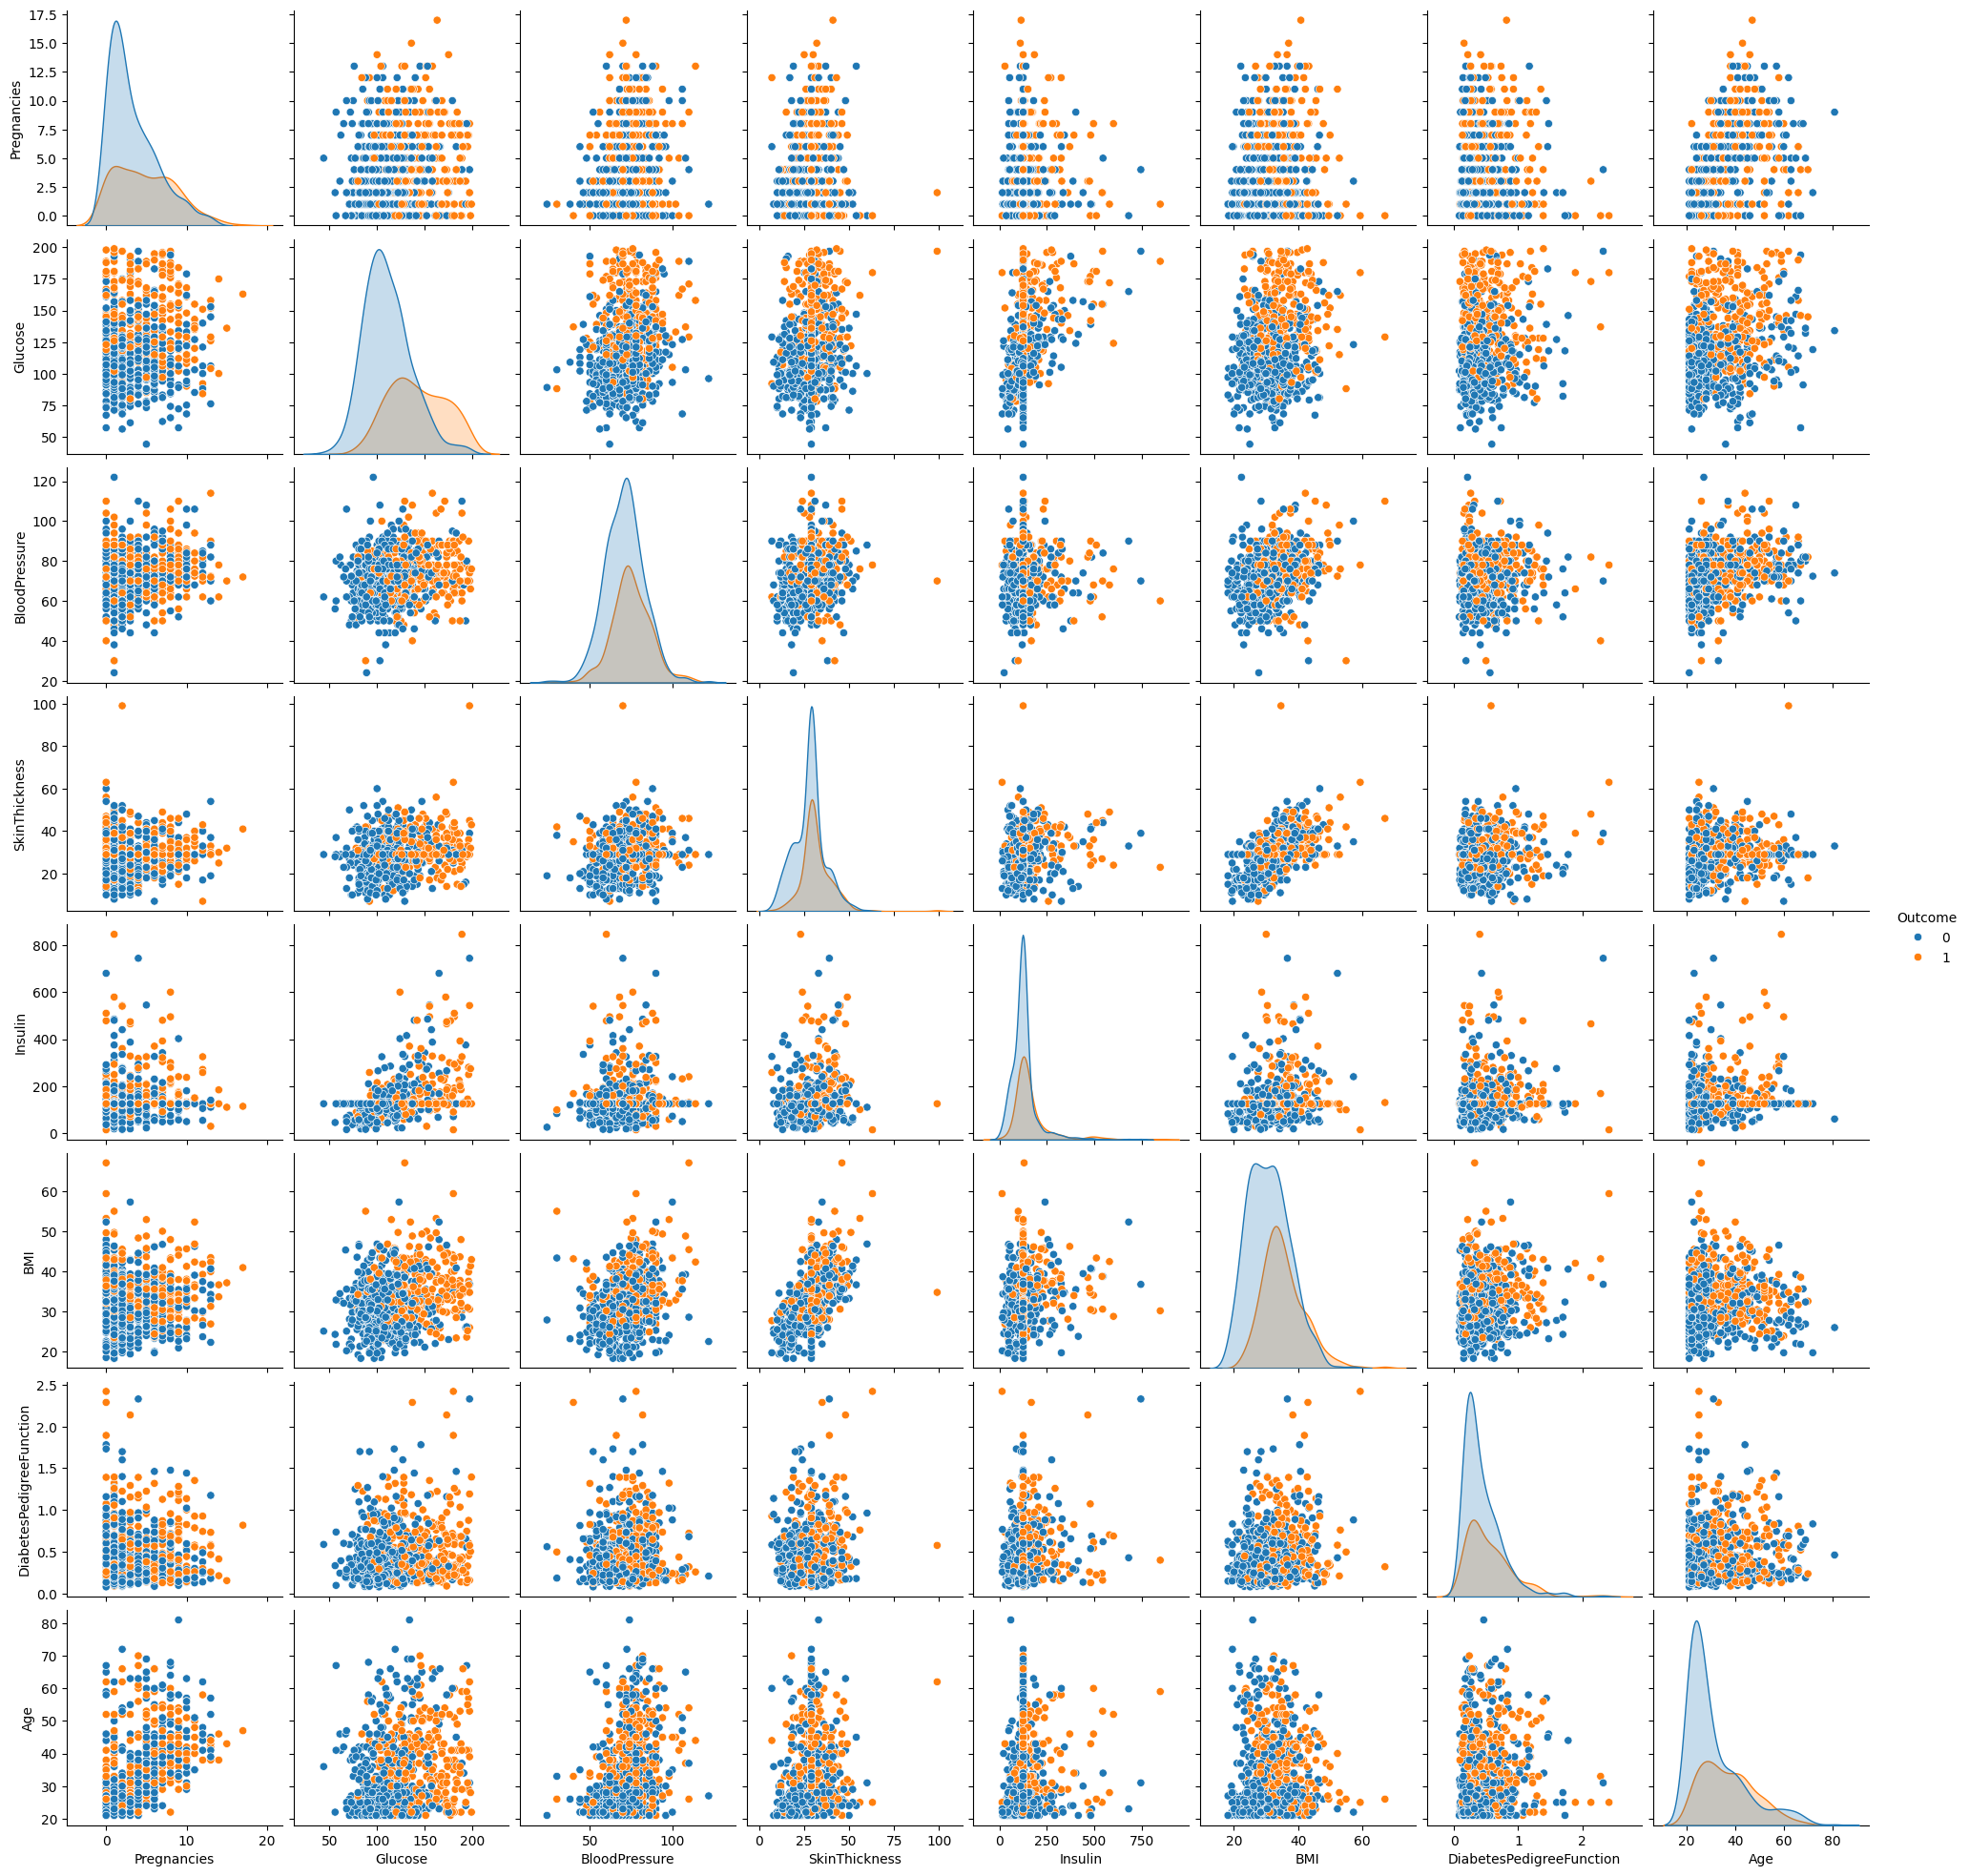

In [18]:
#plotting pair plots for the data 
sns.pairplot(data_copy, hue='Outcome')
plt.show()

In [19]:
correlation =data.corr()
print (correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

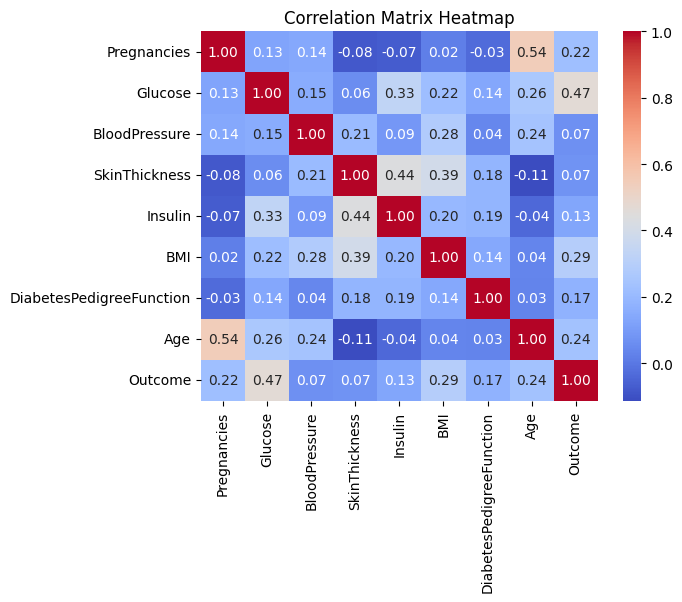

In [20]:
#Display correlation matrix in heatmap
sns.heatmap(correlation, annot= True, cmap='coolwarm', fmt= '.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

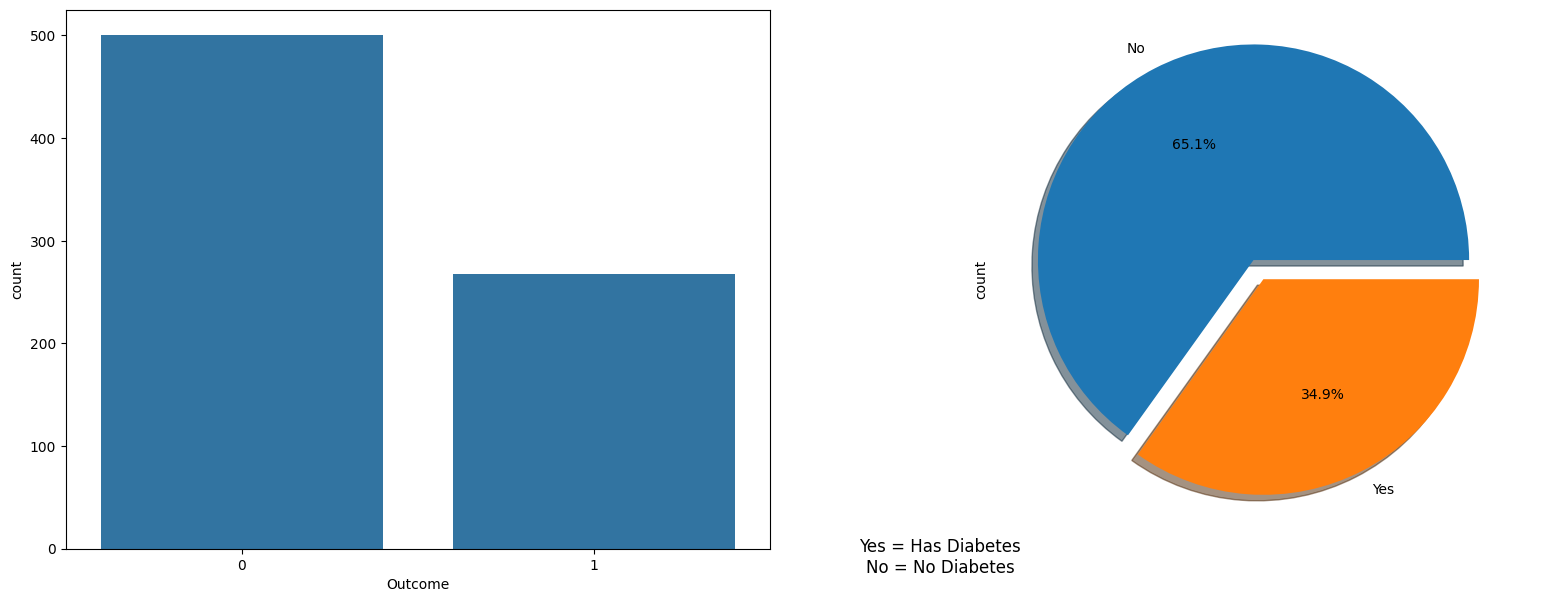

In [27]:
# Création de la figure et des axes
fig, ax = plt.subplots(1,2, figsize=(20,7))
# Graphique en barres 
sns.countplot(data = data, x= "Outcome", ax = ax[0])
# Diagramme circulaire avec des légendes 
data["Outcome"].value_counts().plot.pie(explode= [0.1,0], autopct= "%1.1F%%", labels= ["No","Yes"], shadow= True, ax=ax[1])
# Ajout d'un commentaire sous le diagramme circulaire
ax[1].annotate('Yes = Has Diabetes\nNo = No Diabetes', xy=(-1, -1), xytext=(-1.5, -1.2),
               fontsize=12, ha='center', va='top')
plt.show()

In [22]:
X =data.drop("Outcome" ,axis=1)
Y =data['Outcome']
X_train,X_test,Y_train,Y_Test =train_test_split(X,Y,test_size=0.2)

In [23]:
model=LogisticRegression(max_iter=768)
model.fit(X_train,Y_train)

LogisticRegression(max_iter=768)

In [24]:
prediction = model.predict(X_test)
print (prediction)

[0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1
 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0
 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 1 0 0 1]


In [25]:
accuracy = accuracy_score(prediction, Y_Test)
print(accuracy)

0.7987012987012987


In [26]:
 # This would be the result of your accuracy_score function
accuracy = accuracy_score(prediction, Y_Test)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 79.87%
